# Part One: Data Exploration

In [136]:
import pandas as pd
insurance = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
insurance.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [24]:
insurance.describe(),insurance.select_dtypes(include=['object']).describe()

(              age         bmi       charges
 count  431.000000  431.000000    431.000000
 mean    37.960557   30.768898  12297.098118
 std     16.363909    6.111362  11876.527128
 min     18.000000   15.960000   1131.506600
 25%     22.000000   26.357500   2710.444575
 50%     34.000000   30.590000   9866.304850
 75%     55.000000   35.272500  14510.872600
 max     64.000000   49.060000  55135.402090,
            sex smoker     region
 count      431    431        431
 unique       2      2          4
 top     female     no  southeast
 freq       225    344        125)

In [25]:
insurance.isnull().sum()

age        0
sex        0
bmi        0
smoker     0
region     0
charges    0
dtype: int64

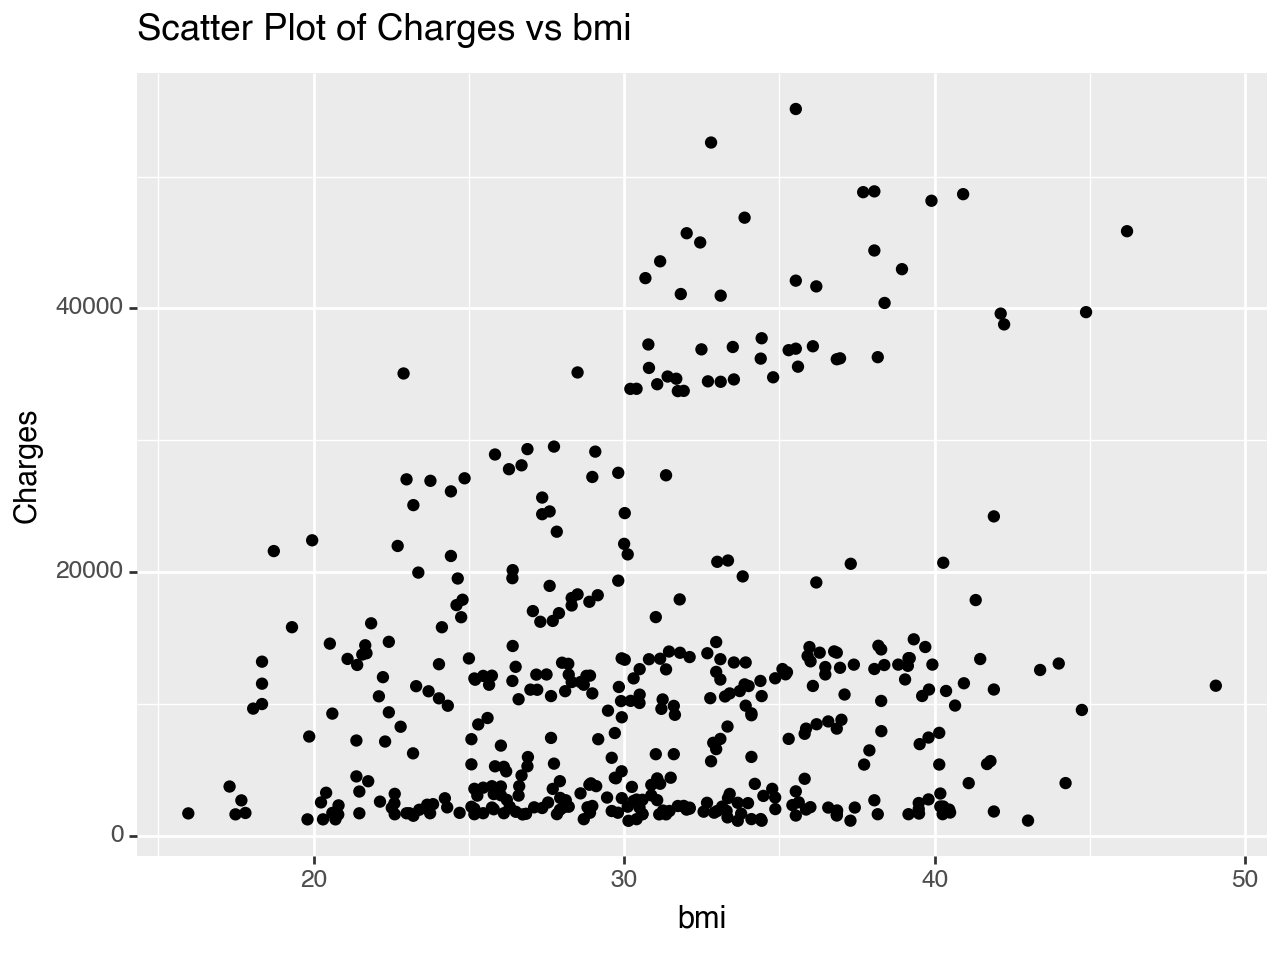

<Figure Size: (640 x 480)>

In [26]:
from plotnine import ggplot, aes, geom_point, labs

(ggplot(insurance,
aes(
  x = "bmi",
  y = "charges"
))
+ geom_point()
+ labs(title='Scatter Plot of Charges vs bmi', x='bmi', y='Charges')
)

In Charges and bmi scatter plot, for all bmi, most of the charges are between 0 and 20,000. However, when bmi increases, there are higher chances that the charges could go up.

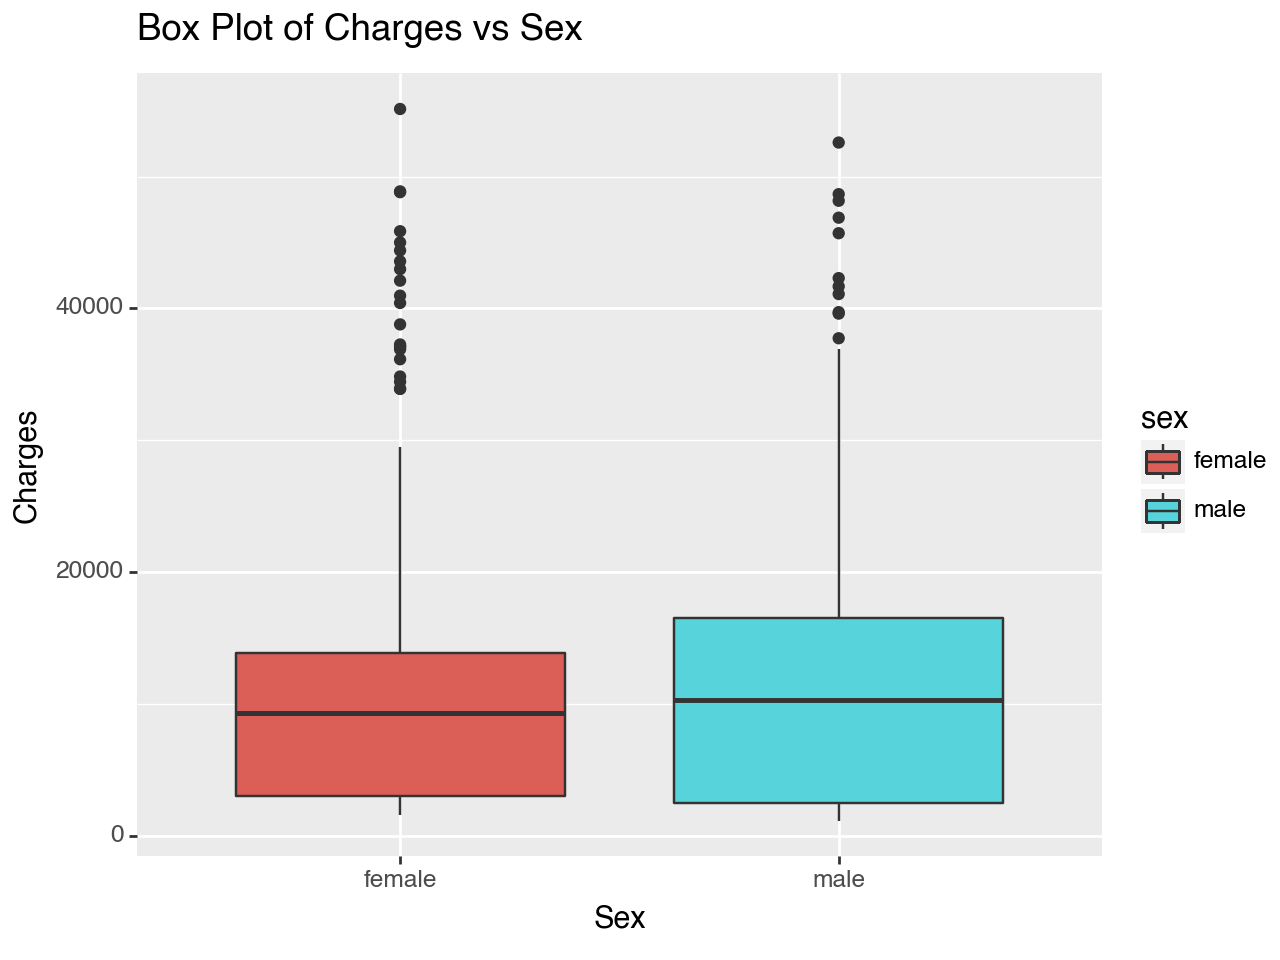

<Figure Size: (640 x 480)>

In [27]:
from plotnine import geom_boxplot

(ggplot(insurance,
aes(
  x = "sex",
  y = "charges",
  fill = "sex"
))
+ geom_boxplot()
+ labs(title='Box Plot of Charges vs Sex', x='Sex', y='Charges')
)

The boxplot compares the charges in two different groups. Based on the plot, males tend to have slightly higher charges tham females. 

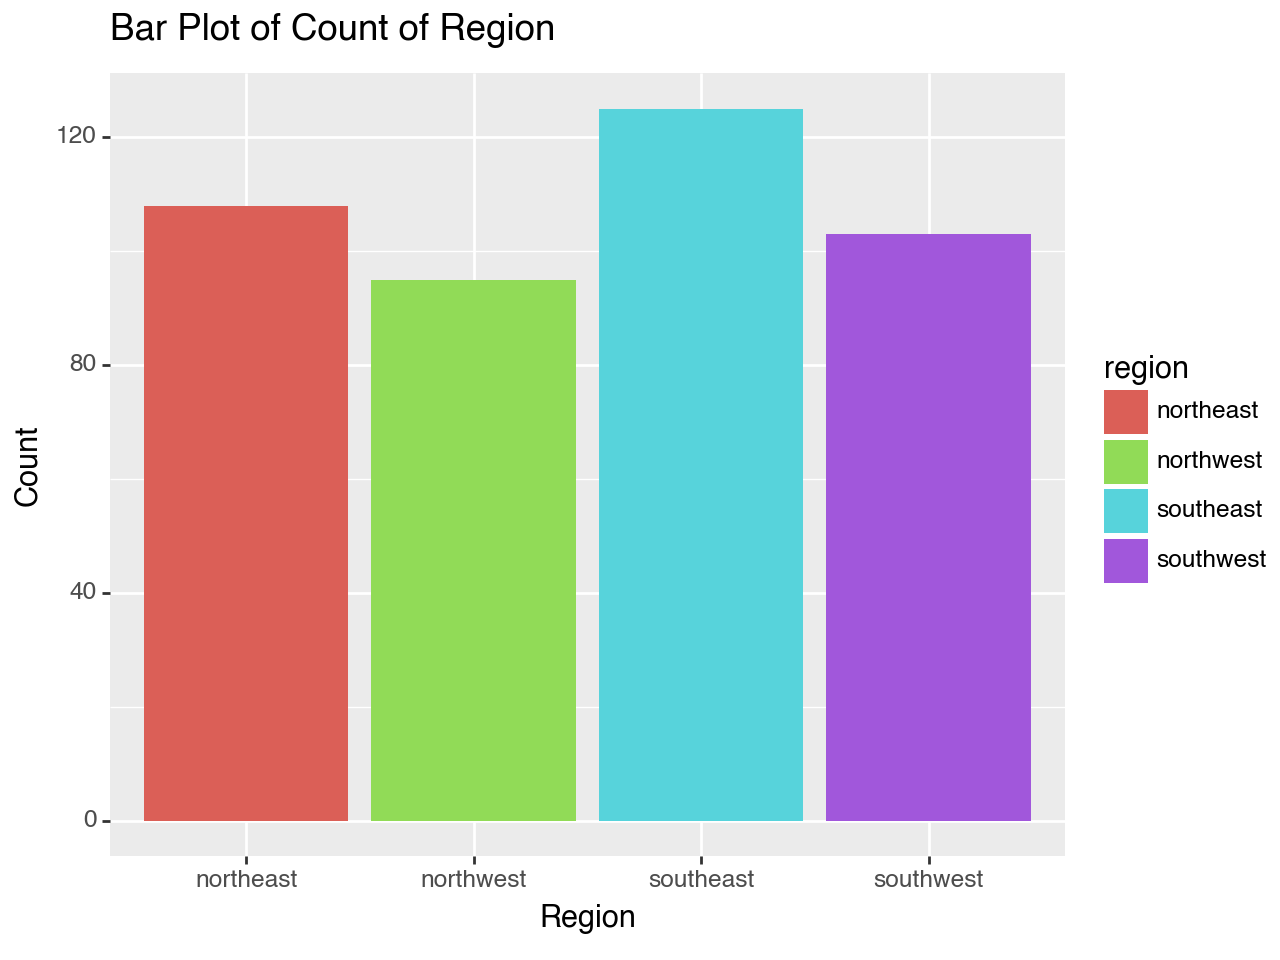

<Figure Size: (640 x 480)>

In [28]:
from plotnine import geom_bar

(ggplot(insurance,
aes(
  x = "region",
  fill = 'region'
))
+ geom_bar()
+ labs(title='Bar Plot of Count of Region', x='Region', y='Count')
)

The barplot shows the number of data in four different regions. The southeast region has the most people in the dataset and the northwest region has the least.

# Part Two: Simple Linear Models

2.1

In [72]:
y = insurance['charges'].values
X = insurance['age'].values.reshape(-1,1)

In [73]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [75]:
lr_fitted = lr.fit(X_train, y_train)
lr_fitted.coef_

array([195.17202549])

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

(mse, r_squared)

(153074128.28096116, 0.13738469584015767)

The large MSE and small R^2 indcate that the model does't fit the data verywell. We might want to introduce some new variables to this model. The coefficient 234.978 means that when the age increases 1 unit, the charge will increse 234.978 unites. 

2.2

In [77]:
insurance_dummified = pd.get_dummies(insurance, columns=['sex'], drop_first=True)
insurance_dummified.head()

,age,bmi,smoker,region,charges,sex_male
0,19,27.900,yes,southwest,16884.92400,0
1,33,22.705,no,northwest,21984.47061,1
2,32,28.880,no,northwest,3866.85520,1
3,31,25.740,no,southeast,3756.62160,0
4,60,25.840,no,northwest,28923.13692,0


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = insurance_dummified[['age', 'sex_male']]
y = insurance_dummified['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr_2= LinearRegression()
lr_2.fit(X_train, y_train)

y_pred_2 = lr_2.predict(X_test)

coefficients_2 = lr_2.coef_

mse_2 = mean_squared_error(y_test, y_pred_2)

r2_2 = r2_score(y_test, y_pred)

coefficients_2, mse_2, r2_2

(array([ 240.86077539, 1169.315135  ]),
 107343134.51688665,
 -0.13567923161029416)

2.3

In [87]:
insurance_dummified_2 = pd.get_dummies(insurance_dummified, columns=['smoker'], drop_first=True)
insurance_dummified_2.head()

,age,bmi,region,charges,sex_male,smoker_yes
0,19,27.900,southwest,16884.92400,0,1
1,33,22.705,northwest,21984.47061,1,0
2,32,28.880,northwest,3866.85520,1,0
3,31,25.740,southeast,3756.62160,0,0
4,60,25.840,northwest,28923.13692,0,0


In [92]:
X = insurance_dummified_2[['age', 'smoker_yes']]
y = insurance_dummified_2['charges']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.25)

lr_3= LinearRegression()
lr_3.fit(X_train_new, y_train_new)

y_pred_new = lr_3.predict(X_test_new)

coefficients_3 = lr_3.coef_

mse_3 = mean_squared_error(y_test_new, y_pred_new)

r2_3 = r2_score(y_test_new, y_pred_new)

coefficients_3, mse_3, r2_3


(array([  263.57939557, 23310.84772972]),
 21157597.325796477,
 0.8174441720322831)

2.4

The model 3 is better because it has smaller MSE and greater R^2 which means the model 3 fit the data better than model 2.

# Part Three: Multiple Linear Models

3.1

In [93]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [102]:
scaler = StandardScaler()

age_standardized = scaler.fit_transform(insurance[['age']])
bmi_standardized = scaler.fit_transform(insurance[['bmi']])

insurance['age'] = age_standardized
insurance['bmi'] = bmi_standardized

insurance.head()

,age,sex,bmi,smoker,region,charges
0,-1.160028,female,-0.469982,yes,southwest,16884.92400
1,-0.303492,male,-1.321026,no,northwest,21984.47061
2,-0.364673,male,-0.309439,no,northwest,3866.85520
3,-0.425855,female,-0.823833,no,southeast,3756.62160
4,1.348398,female,-0.807451,no,northwest,28923.13692


In [103]:
X = insurance[['age', 'bmi']]
y = insurance['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [104]:
lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)
y_preds = lr_fit.predict(X_test)
r2_score(y_test, y_preds)

0.16120054227163516

In [105]:
mean_squared_error(y_test, y_preds)

122723744.92882995

This model has lower MSE and higher R^2 compare to the model in Part Two Q1. It modified the predition by adding the bmi variable. 

3.2

In [130]:
insurance['age_2']=insurance['age']**2
X = insurance[['age','age_2']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)
y_pred = lr_fit.predict(X_test)
r2_score(y_test, y_pred)

0.023402460923519164

In [131]:
mean_squared_error(y_test, y_preds)

148193581.72213766

This model has slightly lower MSE but much lower R^2 comparing to the model in part 2 Q1.Therefore, this model is not premiumer than the simple age model.  

3.3

In [145]:
from sklearn.model_selection import GridSearchCV

ct_poly = ColumnTransformer(
  [
    ("polynomial", PolynomialFeatures(), ["age"])
  ],
  remainder = "drop"
)

lr_pipeline_poly = Pipeline(
  [("preprocessing", ct_poly),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

degrees = {'preprocessing__polynomial__degree': np.arange(1, 13)}

gscv = GridSearchCV(lr_pipeline_poly, degrees, cv = 5, scoring='r2')

In [146]:
X = insurance[['age']]
y = insurance['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

gscv_fitted = gscv.fit(X_train, y_train)
gscv_fitted.cv_results_

{'mean_fit_time': array([0.01696658, 0.01459417, 0.01409249, 0.01343083, 0.01062284,
        0.01167912, 0.01075659, 0.01028237, 0.01493201, 0.01414585,
        0.0112174 , 0.01237669]),
 'std_fit_time': array([0.00275715, 0.00140526, 0.00350896, 0.00072014, 0.00142657,
        0.00126213, 0.00039934, 0.00124483, 0.00173471, 0.00108317,
        0.00153046, 0.00205733]),
 'mean_score_time': array([0.0122736 , 0.00844946, 0.00826173, 0.00921273, 0.00678921,
        0.00853004, 0.00685816, 0.00691338, 0.01131167, 0.00962262,
        0.00798922, 0.00803714]),
 'std_score_time': array([0.00382842, 0.00126191, 0.00225797, 0.00172048, 0.00104036,
        0.00146084, 0.00073653, 0.00057188, 0.00299807, 0.00213234,
        0.00085463, 0.00049266]),
 'param_preprocessing__polynomial__degree': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?'

In [147]:
pd.DataFrame(data = {"degrees": np.arange(1, 13), "scores": gscv_fitted.cv_results_['mean_test_score']})

,degrees,scores
0,1,0.049197
1,2,0.043963
2,3,0.043462
3,4,0.047803
4,5,0.040494
5,6,0.026946
6,7,0.016099
7,8,0.017038
8,9,0.017941
9,10,0.017918


In [148]:
degree_4_estimator = gscv.cv_results_['params'][3]
gscv.best_estimator_.set_params(**degree_4_estimator)

gscv.best_estimator_.fit(X_train, y_train)

y_pred_degree_4 = gscv.best_estimator_.predict(X_test)

mean_squared_error(y_test, y_pred_degree_4)

112257489.1945375

3.4

In [149]:
degree_12_estimator = gscv.cv_results_['params'][11]
gscv.best_estimator_.set_params(**degree_12_estimator)

gscv.best_estimator_.fit(X_train, y_train)

y_pred_degree_12 = gscv.best_estimator_.predict(X_test)

mean_squared_error(y_test, y_pred_degree_12)

112926497.03437586

3.5

Overall the model of degree of 4 has the lowerst MSE. However, increasing in the polynomial degree doesn't lead to a better predition. The model with degree of 12 caused an overfitting in the trainning dataset.

3.6

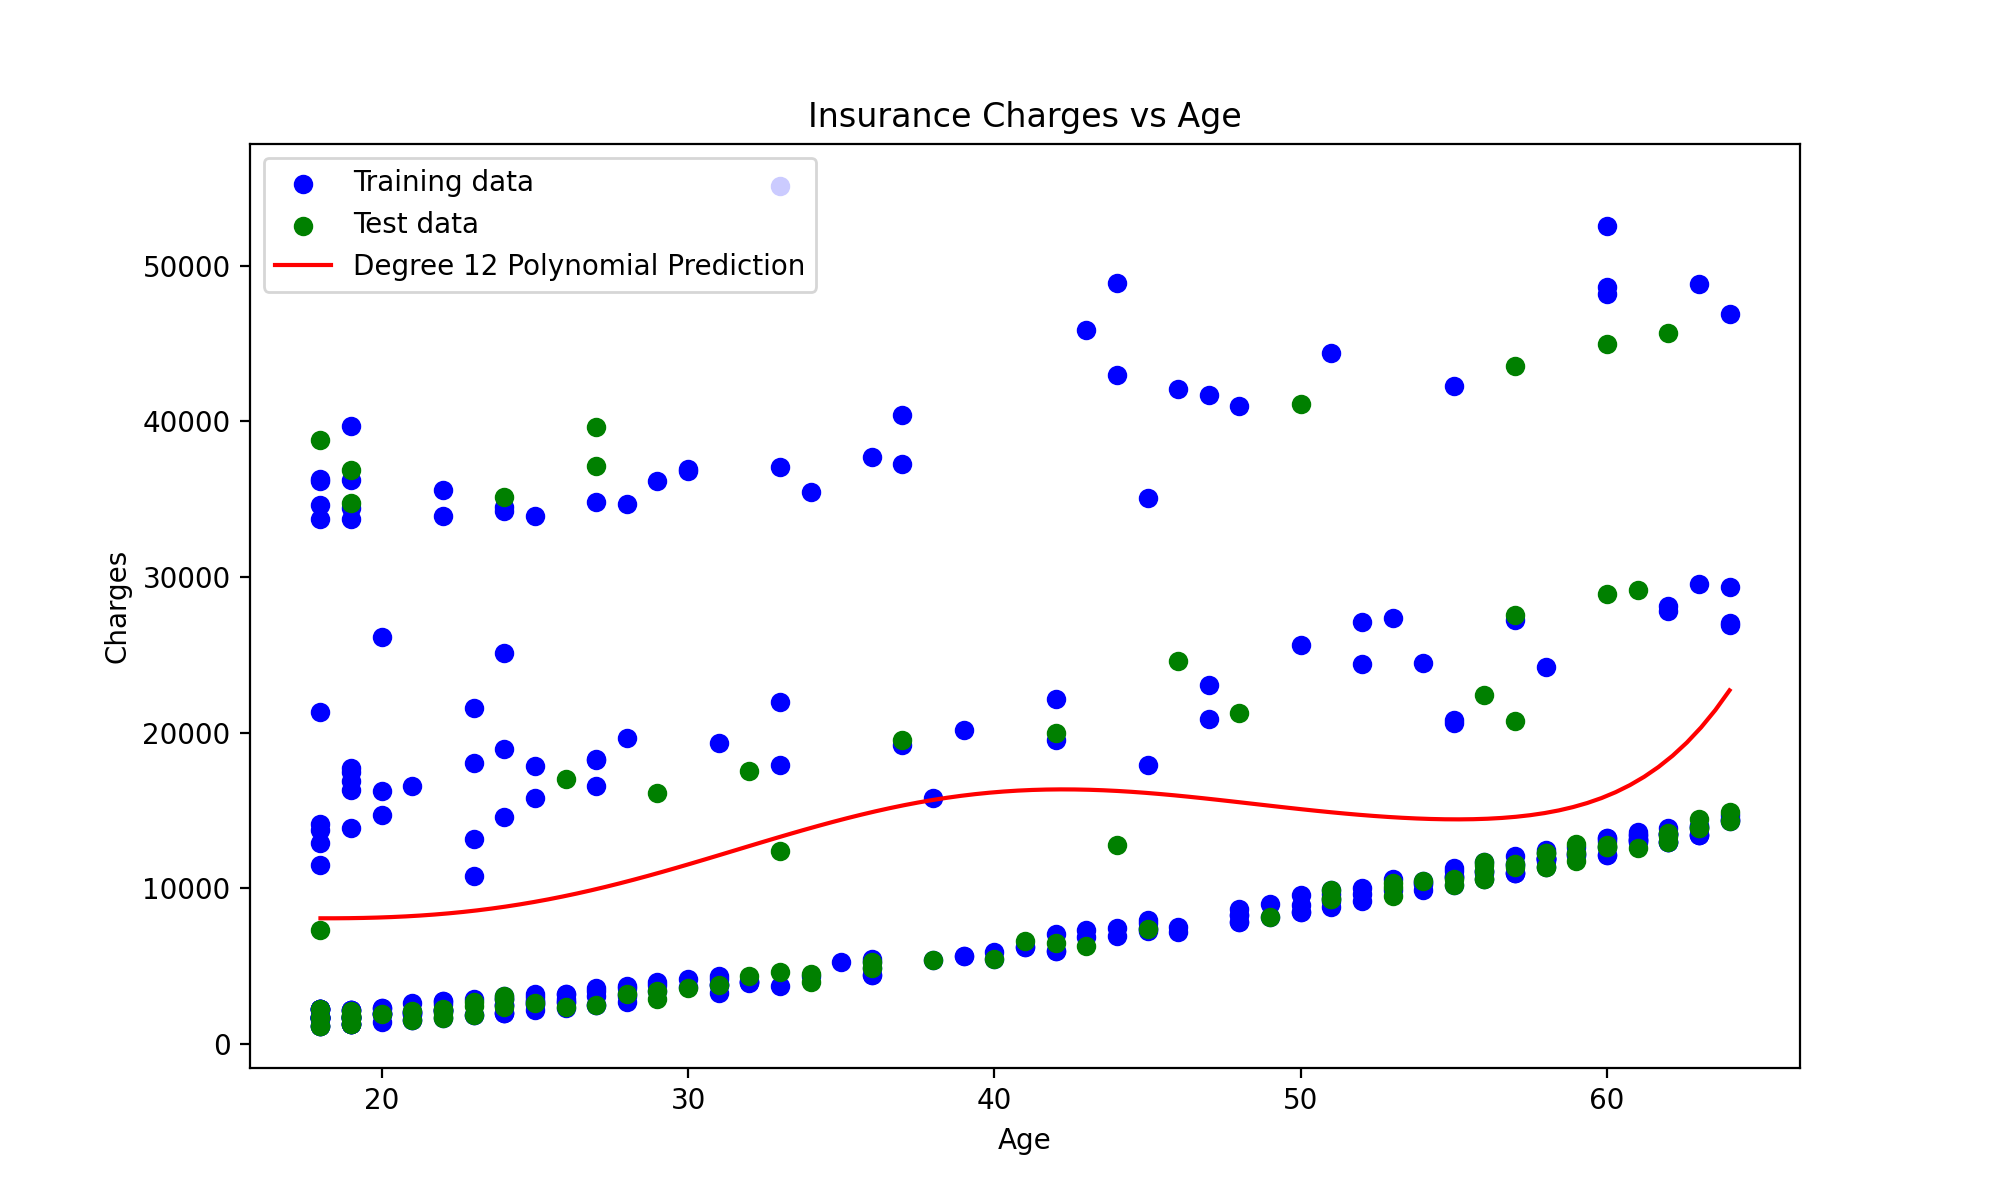

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_train['age'], y_train, color='blue', label='Training data')
plt.scatter(X_test['age'], y_test, color='green', label='Test data')

age_range = pd.DataFrame({'age': np.linspace(X['age'].min(), X['age'].max(), 100)})

predicted_charges = gscv.best_estimator_.predict(age_range)

plt.plot(age_range['age'], predicted_charges, color='red', label='Degree 12 Polynomial Prediction')

plt.title('Insurance Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

# Part Four: New data

In [152]:
insurance_new = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")
insurance_new.head()

,age,sex,bmi,smoker,region,charges
0,23,male,34.400,no,southwest,1826.84300
1,56,male,40.300,no,southwest,10602.38500
2,18,male,34.100,no,southeast,1137.01100
3,63,female,23.085,no,northeast,14451.83515
4,63,male,28.310,no,northwest,13770.09790


In [154]:
#Only age as a predictor model1
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
insurance['smoker'] = label_encoder.fit_transform(insurance['smoker'])
insurance_new['smoker'] = label_encoder.transform(insurance_new['smoker'])

X1_train = insurance[['age']]
y_train = insurance['charges']
X1_test = insurance_new[['age']]

model_1 = LinearRegression()
model_1.fit(X1_train, y_train)

y_pred_1 = model_1.predict(X1_test)

mse_1 = mean_squared_error(insurance_new['charges'], y_pred_1)
mse_1

136077136.50195494

In [155]:
#age and bmi as a predictor model2
X2_train = insurance[['age', 'bmi']]

model_2 = LinearRegression()
model_2.fit(X2_train, y_train)

X2_test = insurance_new[['age', 'bmi']]

y_pred_2 = model_2.predict(X2_test)

mse_2 = mean_squared_error(insurance_new['charges'], y_pred_2)
mse_2

132636406.1108129

In [156]:
#age, bmi, and smoker as predictors (no interaction terms) model3
X3_train = insurance[['age', 'bmi', 'smoker']]

model_3 = LinearRegression()
model_3.fit(X3_train, y_train)

X3_test = insurance_new[['age', 'bmi', 'smoker']]

y_pred_3 = model_3.predict(X3_test)

mse_3 = mean_squared_error(insurance_new['charges'], y_pred_3)
mse_3

35377541.24141632

In [157]:
#age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker) model4
ct_inter = ColumnTransformer(
  [
    ("interaction", PolynomialFeatures(interaction_only = True), ['age', 'bmi', 'smoker'])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

X4_train_ct_inter = ct_inter.fit_transform(insurance)

model_4_ct = LinearRegression()
model_4_ct.fit(X4_train_ct_inter, y_train)

X4_test_ct_inter = ct_inter.transform(insurance_new)

y_pred_4_ct = model_4_ct.predict(X4_test_ct_inter)

mse_4_ct = mean_squared_error(insurance_new['charges'], y_pred_4_ct)
mse_4_ct

21785261.846899673

In [159]:
#age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker) model5
insurance['age_smoker'] = insurance['age'] * insurance['smoker']
insurance['bmi_smoker'] = insurance['bmi'] * insurance['smoker']
insurance_new['age_smoker'] = insurance_new['age'] * insurance_new['smoker']
insurance_new['bmi_smoker'] = insurance_new['bmi'] * insurance_new['smoker']

X5_train = insurance[['age_smoker', 'bmi_smoker']]
X5_test = insurance_new[['age_smoker', 'bmi_smoker']]

model_5 = LinearRegression()
model_5.fit(X5_train, y_train)

y_pred_5 = model_5.predict(X5_test)

mse_5 = mean_squared_error(insurance_new['charges'], y_pred_5)
mse_5

47626025.35814418

The model 4 is the best model to use since it has the smallest MSE 21785261.85.

<Figure size 1000x600 with 0 Axes>

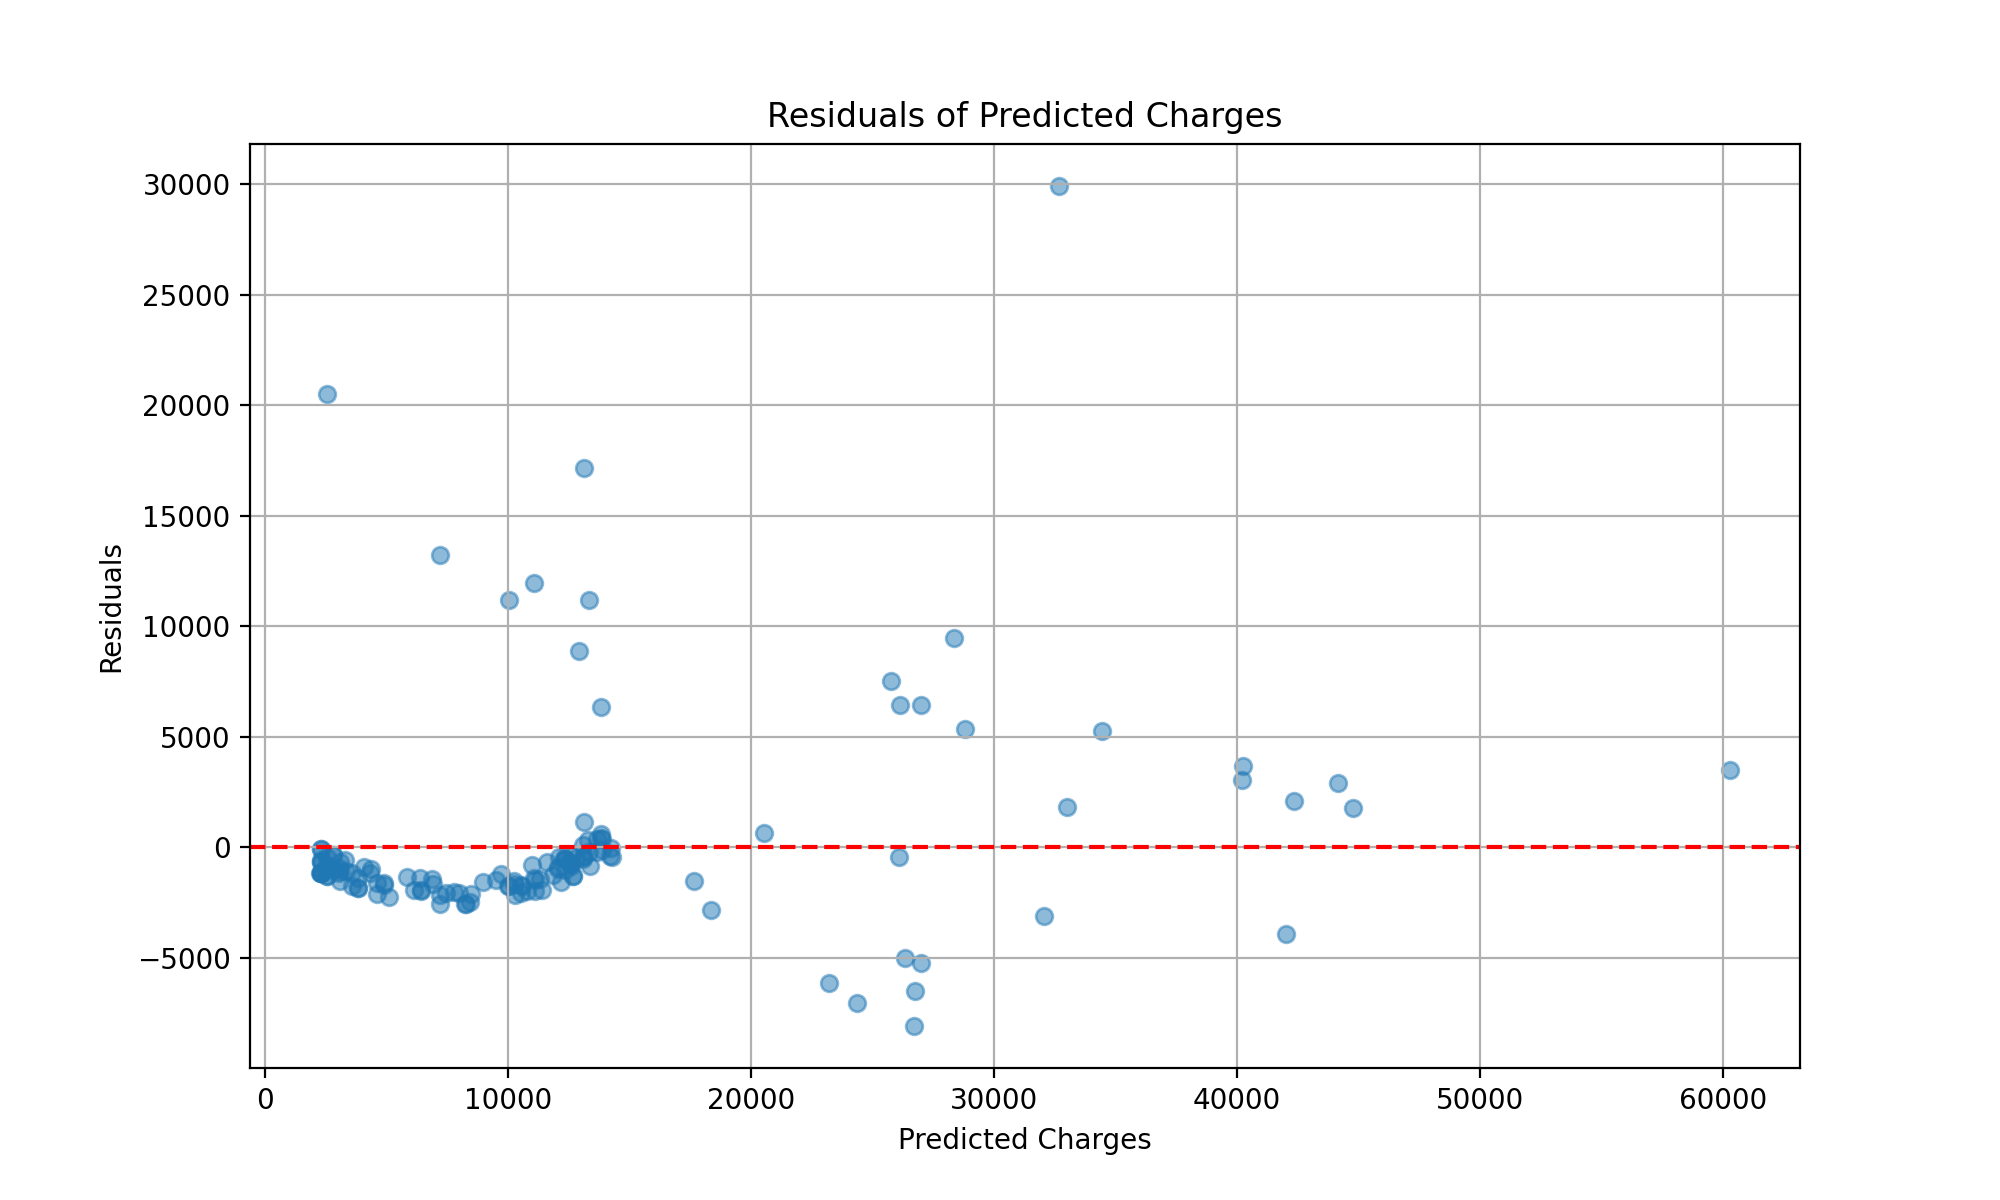

In [162]:
residuals = insurance_new['charges'] - y_pred_4_ct

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_4_ct, residuals, alpha=0.5)
plt.title('Residuals of Predicted Charges')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

# Part Five: Full Exploration

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

categorical_columns = ['sex', 'smoker', 'region']
numerical_columns = ['age', 'bmi']
y = 'charges'

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

preprocessor.fit(insurance)

X_train_transformed = preprocessor.transform(insurance.drop(y, axis=1))
y_train = insurance[y]
X_test_transformed = preprocessor.transform(insurance_new.drop(y, axis=1))
y_test = insurance_new[y]

transformed_features = (preprocessor.named_transformers_['num'].get_feature_names_out(numerical_columns).tolist() +
                        preprocessor.named_transformers_['cat'].get_feature_names_out().tolist())

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_features)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=transformed_features)

X_train_transformed_df.head(), X_test_transformed_df.head()

(        age       bmi  sex_male  smoker_1  region_northwest  region_southeast  \
 0 -1.160028 -0.469982       0.0       1.0               0.0               0.0   
 1 -0.303492 -1.321026       1.0       0.0               1.0               0.0   
 2 -0.364673 -0.309439       1.0       0.0               1.0               0.0   
 3 -0.425855 -0.823833       0.0       0.0               0.0               1.0   
 4  1.348398 -0.807451       0.0       0.0               1.0               0.0   
 
    region_southwest  
 0               1.0  
 1               0.0  
 2               0.0  
 3               0.0  
 4               0.0  ,
         age       bmi  sex_male  smoker_1  region_northwest  region_southeast  \
 0 -0.915303  0.594846       1.0       0.0               0.0               0.0   
 1  1.103673  1.561383       1.0       0.0               0.0               0.0   
 2 -1.221209  0.545700       1.0       0.0               0.0               1.0   
 3  1.531941 -1.258775       0.0       

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def evaluate_model(X, y, degrees):
    scores = []
    for degree in degrees:
        # Create a pipeline that first transforms the features into polynomial features, then applies linear regression
        model = make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression())
        # Perform cross-validation and then take the mean of the cross-validated scores
        score = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5).mean()
        scores.append((degree, score))
    return scores

degrees = list(range(1, 5))
cv_scores = evaluate_model(X_train_transformed, y_train, degrees)
cv_scores_df = pd.DataFrame(cv_scores, columns=['Degree', 'Mean Squared Error'])
cv_scores_df

,Degree,Mean Squared Error
0,1,3.118500e+07
1,2,1.972624e+07
2,3,2.674100e+07
3,4,3.268380e+08


In [173]:
best_degree = cv_scores_df.loc[cv_scores_df['Mean Squared Error'].idxmin(), 'Degree']
best_model = make_pipeline(PolynomialFeatures(best_degree, include_bias=False), LinearRegression())
best_model.fit(X_train_transformed, y_train)

y_pred = best_model.predict(X_test_transformed)

residuals = y_test - y_pred

mse_test = mean_squared_error(y_test, y_pred)

mse_test, residuals[:10] 

(24565034.59519903,
 0    -870.889579
 1   -1043.956620
 2     -84.947956
 3    1237.409191
 4   -1557.334062
 5   -1054.095747
 6   -3980.363399
 7   -2641.115490
 8   -2184.489723
 9   -1023.383936
 Name: charges, dtype: float64)

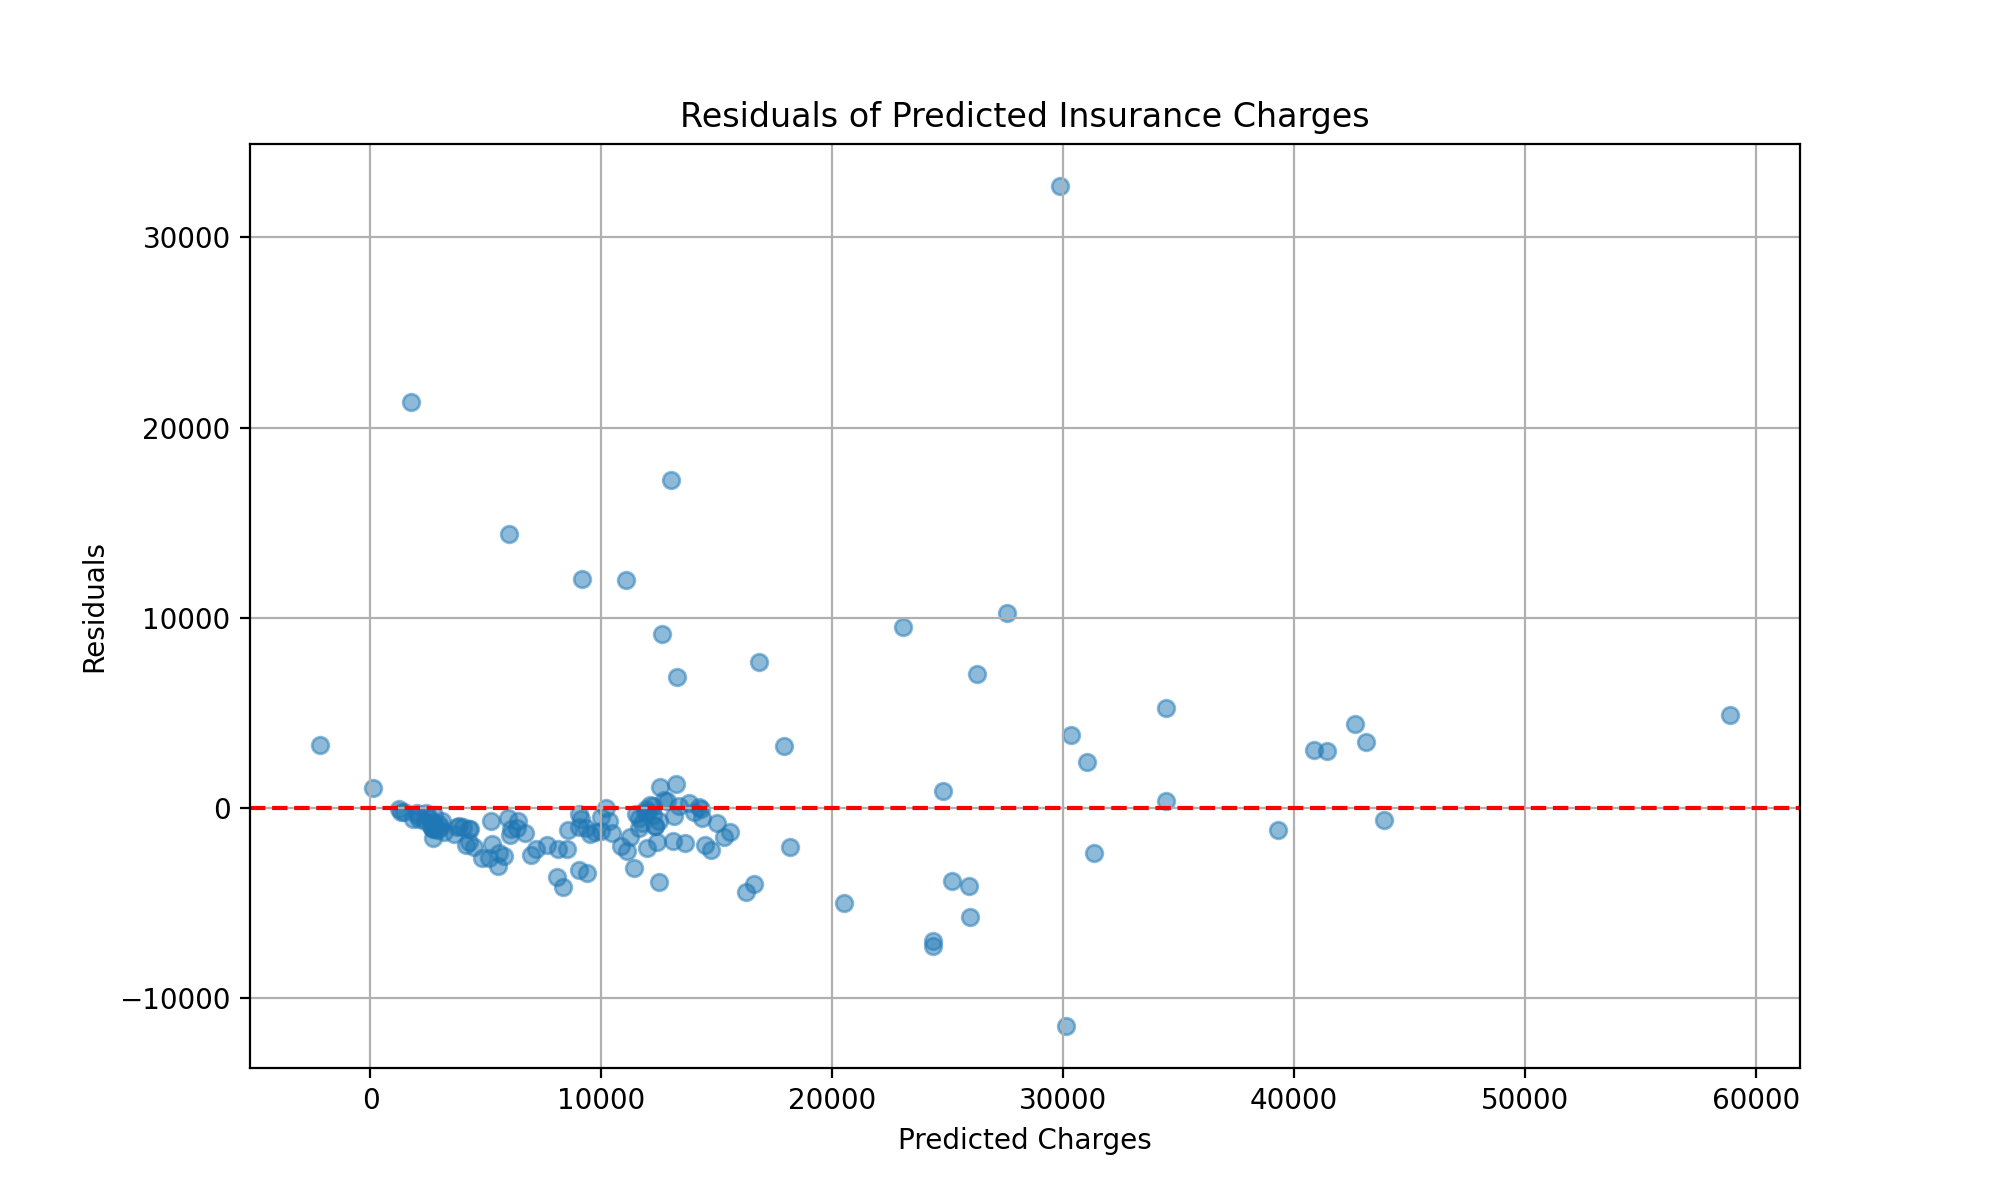

In [174]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals of Predicted Insurance Charges')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()